# Understanding measures

In [1]:
import networkx as nx
import numpy as np

import matplotlib.lines as lines
% matplotlib inline

In [2]:
import matplotlib.pyplot as plt

In [3]:
legend_properties = {'weight':'bold'}

In [4]:
G = nx.read_gml("../data/prisoners_network.gml")

In [5]:
def draw_subgraph(graph, filename=None, size=(10, 5)):
    labels = {}
    for i,n in enumerate(graph.nodes()):
        labels.update({n : i})
        
        
    fig, ax = plt.subplots(figsize=size)

    pos = nx.spring_layout(graph)
    nodes = nx.draw_networkx_nodes(graph, pos, linewidths=2, node_color='orange')
    nodes.set_edgecolor('black'); nx.draw_networkx_edges(graph, pos)

    nx.draw_networkx_labels(graph, pos, labels)
    limits=plt.axis('off')

    h = []
    for name in labels:
        h.append(lines.Line2D([], [], marker='$' + str(labels[name]) + '$', markersize=8, 
                              label=name.title(), linewidth=0, color='darkorange'))

        lgd  = ax.legend(handles=h, fontsize=20, bbox_to_anchor=(0, 1), prop=legend_properties)
    
    if filename:
        plt.savefig(filename, bbox_extra_artists=(lgd,), bbox_inches='tight')

Connected components
--------------------

In [6]:
nx.number_connected_components(G)

529

In [7]:
graphs = list(nx.connected_component_subgraphs(G))

In [8]:
Z = graphs[1]

In [9]:
labels = {}
for i,n in enumerate(Z.nodes()):
    labels.update({n : i})

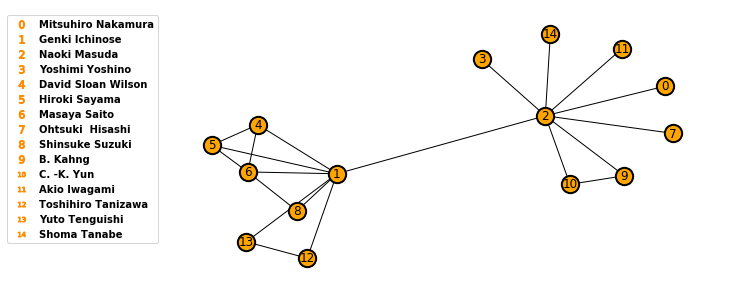

In [83]:
fig, ax = plt.subplots(figsize=(10, 5))

pos = nx.spring_layout(Z)
nodes = nx.draw_networkx_nodes(Z, pos, linewidths=2, node_color='orange')
nodes.set_edgecolor('black'); nx.draw_networkx_edges(Z, pos)

nx.draw_networkx_labels(Z, pos, labels)
limits=plt.axis('off')

h = []
for name in labels:
    h.append(lines.Line2D([], [], marker='$' + str(labels[name]) + '$', markersize=8, 
                          label=name.title(), linewidth=0, color='darkorange'))
    
    lgd  = ax.legend(handles=h, fontsize=20, bbox_to_anchor=(0, 1), prop=legend_properties)
    
plt.savefig('/home/nightwing/rsc/Literature-Article/assets/images/connected_example_one.pdf', 
            bbox_extra_artists=(lgd,), bbox_inches='tight')

In [10]:
H = nx.subgraph(G, ['kyle harriff', 'mikhail g. myagkov', 
                    'tatiana s. babkina', 'ali alshawish', 
                    'hermann de meer', 'yan junhao', 
                    'm. ramzan', 'jobin idiculla'])

In [11]:
nx.number_connected_components(H)

5

In [11]:
labels = {}
for i,n in enumerate(H.nodes()):
    labels.update({n : i})

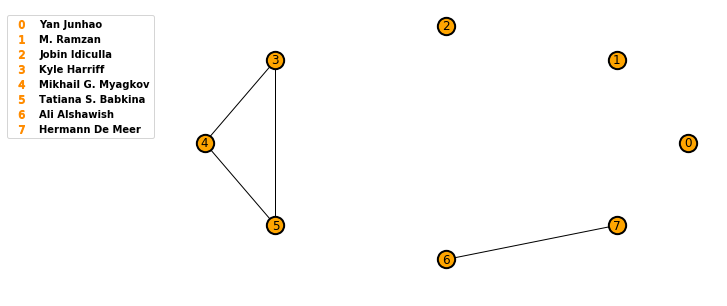

In [99]:
fig, ax = plt.subplots(figsize=(10, 5))

pos = nx.shell_layout(H)
nodes = nx.draw_networkx_nodes(H, pos, linewidths=2, node_color='orange')
nodes.set_edgecolor('black'); nx.draw_networkx_edges(H, pos)

nx.draw_networkx_labels(H, pos, labels)
limits=plt.axis('off')

h = []
for name in labels:
    h.append(lines.Line2D([], [], marker='$' + str(labels[name]) + '$', markersize=8, 
                          label=name.title(), linewidth=0, color='darkorange'))
    
    lgd  = ax.legend(handles=h, fontsize=20, bbox_to_anchor=(0, 1), prop=legend_properties)
    
plt.savefig('/home/nightwing/rsc/Literature-Article/assets/images/connected_example_two.pdf', 
            bbox_extra_artists=(lgd,), bbox_inches='tight')

Clustering
-----------

In [12]:
nx.average_clustering(G)

0.6801249686991053

In [13]:
H = nx.subgraph(G, list(G.neighbors('r. axelrod')) + ['r. axelrod'])

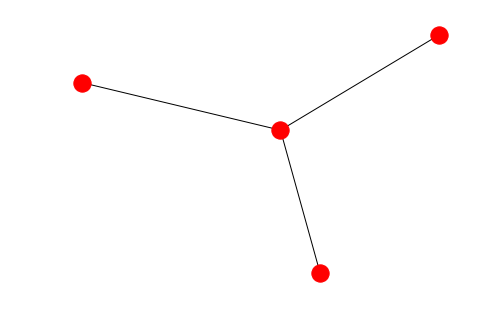

In [14]:
nx.draw(H)

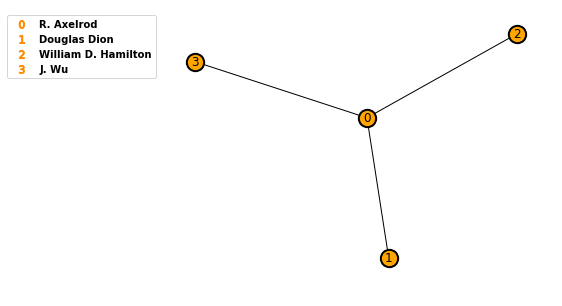

In [51]:
draw_subgraph(H, size=(7, 5),
              filename='/home/nightwing/rsc/Literature-Article/assets/images/clustering_example_one.pdf')

In [15]:
nx.average_clustering(H)

0.0

In [16]:
H = nx.subgraph(G, list(G.neighbors('nikoleta glynatsi')) + ['nikoleta glynatsi'])

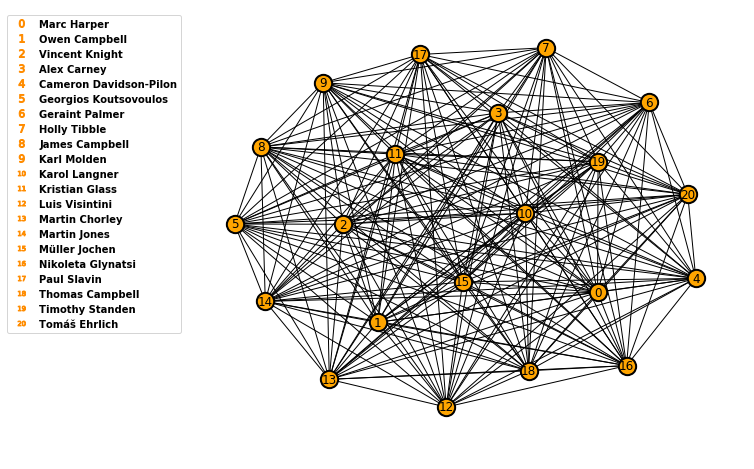

In [54]:
draw_subgraph(H, size=(10, 8), filename='/home/nightwing/rsc/Literature-Article/assets/images/clustering_example_three.pdf')

In [17]:
nx.average_clustering(H)

1.0

In [18]:
H = nx.subgraph(G, list(G.neighbors('daniel ashlock')) + ['daniel ashlock'])

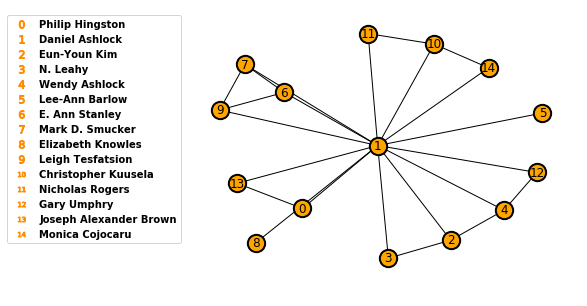

In [19]:
draw_subgraph(H, size=(7, 5))

In [20]:
nx.average_clustering(H)

0.7399267399267399

In [33]:
for name in list(G.nodes()):
    H = nx.subgraph(G, list(G.neighbors(name)) + [name])
    cc = nx.average_clustering(H)
    
    if (cc > 0) and (cc < 0.5):
        print(name)

naoki masuda
leopold-wildburger  ulrike


In [34]:
H = nx.subgraph(G, list(G.neighbors('naoki masuda')) + ['naoki masuda'])

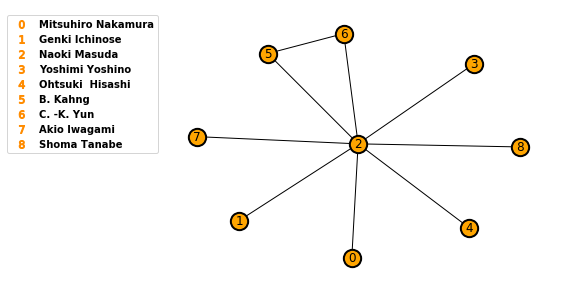

In [25]:
draw_subgraph(H, size=(7, 5),  filename='/home/nightwing/rsc/Literature-Article/assets/images/clustering_example_two.pdf')

In [22]:
nx.average_clustering(H)

0.22619047619047616

In [26]:
sorted(nx.closeness_centrality(H).items(), key=lambda x:x[1], reverse=True)[0:10]

[('naoki masuda', 1.0),
 ('b. kahng', 0.5714285714285714),
 ('c. -k. yun', 0.5714285714285714),
 ('mitsuhiro nakamura', 0.5333333333333333),
 ('genki ichinose', 0.5333333333333333),
 ('yoshimi yoshino', 0.5333333333333333),
 ('ohtsuki  hisashi', 0.5333333333333333),
 ('akio iwagami', 0.5333333333333333),
 ('shoma tanabe', 0.5333333333333333)]

Centrality
----------

In [23]:
for name in list(G.nodes()):
    H = nx.subgraph(G, list(G.neighbors(name)) + [name])
    top = sorted(nx.closeness_centrality(H).items(), key=lambda x:x[1], reverse=True)[0]
    
    if top[1] > 0 and top[1] < 0.8:
        print(top)

In [29]:
sorted(nx.closeness_centrality(Z).items(), key=lambda x:x[1], reverse=True)[0:10]

[('naoki masuda', 0.7),
 ('genki ichinose', 0.6666666666666666),
 ('masaya saito', 0.45161290322580644),
 ('david sloan wilson', 0.4375),
 ('hiroki sayama', 0.4375),
 ('b. kahng', 0.4375),
 ('c. -k. yun', 0.4375),
 ('mitsuhiro nakamura', 0.42424242424242425),
 ('yoshimi yoshino', 0.42424242424242425),
 ('ohtsuki  hisashi', 0.42424242424242425)]

In [32]:
sorted(nx.betweenness_centrality(Z).items(), key=lambda x:x[1], reverse=True)[0:10]

[('naoki masuda', 0.7582417582417583),
 ('genki ichinose', 0.6263736263736264),
 ('masaya saito', 0.01098901098901099),
 ('mitsuhiro nakamura', 0.0),
 ('yoshimi yoshino', 0.0),
 ('david sloan wilson', 0.0),
 ('hiroki sayama', 0.0),
 ('ohtsuki  hisashi', 0.0),
 ('shinsuke suzuki', 0.0),
 ('b. kahng', 0.0)]

In [35]:
sorted(nx.closeness_centrality(H).items(), key=lambda x:x[1], reverse=True)[0:10]

[('naoki masuda', 1.0),
 ('b. kahng', 0.5714285714285714),
 ('c. -k. yun', 0.5714285714285714),
 ('mitsuhiro nakamura', 0.5333333333333333),
 ('genki ichinose', 0.5333333333333333),
 ('yoshimi yoshino', 0.5333333333333333),
 ('ohtsuki  hisashi', 0.5333333333333333),
 ('akio iwagami', 0.5333333333333333),
 ('shoma tanabe', 0.5333333333333333)]

In [36]:
sorted(nx.betweenness_centrality(H).items(), key=lambda x:x[1], reverse=True)[0:10]

[('naoki masuda', 0.9642857142857142),
 ('mitsuhiro nakamura', 0.0),
 ('genki ichinose', 0.0),
 ('yoshimi yoshino', 0.0),
 ('ohtsuki  hisashi', 0.0),
 ('b. kahng', 0.0),
 ('c. -k. yun', 0.0),
 ('akio iwagami', 0.0),
 ('shoma tanabe', 0.0)]

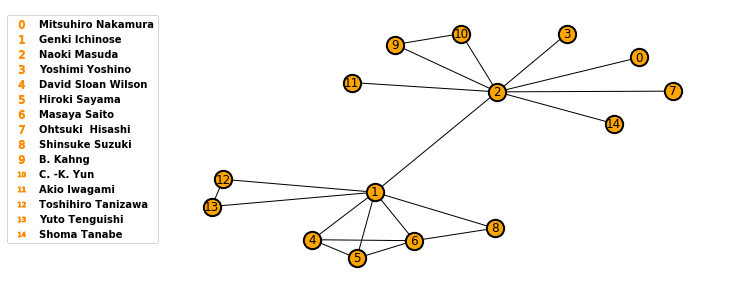

In [31]:
fig, ax = plt.subplots(figsize=(10, 5))

pos = nx.spring_layout(Z)
nodes = nx.draw_networkx_nodes(Z, pos, linewidths=2, node_color='orange')
nodes.set_edgecolor('black'); nx.draw_networkx_edges(Z, pos)

nx.draw_networkx_labels(Z, pos, labels)
limits=plt.axis('off')

h = []
for name in labels:
    h.append(lines.Line2D([], [], marker='$' + str(labels[name]) + '$', markersize=8, 
                          label=name.title(), linewidth=0, color='darkorange'))
    
    lgd  = ax.legend(handles=h, fontsize=20, bbox_to_anchor=(0, 1), prop=legend_properties)

In [37]:
K = nx.Graph()

In [38]:
K.add_edges_from([[1, 3], [1, 2], [1, 4], [4, 5],
                  [4, 6], [4, 7], [4, 14], [14, 8],
                  [14, 9], [14, 10], [14, 11], [14, 12], [14, 13]])

In [39]:
sorted(nx.betweenness_centrality(K).items(), key=lambda x:x[1], reverse=True)[0:10]

[(14, 0.7307692307692307),
 (4, 0.6923076923076923),
 (1, 0.2948717948717949),
 (3, 0.0),
 (2, 0.0),
 (5, 0.0),
 (6, 0.0),
 (7, 0.0),
 (8, 0.0),
 (9, 0.0)]

In [40]:
sorted(nx.closeness_centrality(K).items(), key=lambda x:x[1], reverse=True)[0:10]

[(4, 0.6190476190476191),
 (14, 0.6190476190476191),
 (1, 0.4482758620689655),
 (5, 0.3939393939393939),
 (6, 0.3939393939393939),
 (7, 0.3939393939393939),
 (8, 0.3939393939393939),
 (9, 0.3939393939393939),
 (10, 0.3939393939393939),
 (11, 0.3939393939393939)]

In [2]:
G = nx.Graph()

In [3]:
matrix = np.matrix([[0, 1, 0], [1, 0, 1], [0, 1, 0]])

In [4]:
G = nx.from_numpy_matrix(matrix)

In [5]:
G = nx.complete_graph(3)

In [6]:
G.edges()

[(0, 1), (0, 2), (1, 2)]

In [7]:
nx.betweenness_centrality(G, endpoints=True)

{0: 2.0, 1: 2.0, 2: 2.0}

In [84]:
nx.pagerank_numpy(G)

{0: 0.33333333333333326, 1: 0.33333333333333337, 2: 0.3333333333333333}

example 3
---------

In [133]:
G = nx.Graph()

In [134]:
G.add_nodes_from([1, 2, 3, 4, 5])

In [140]:
G.add_weighted_edges_from([(1, 2, -1), (1, 3, -5), (2, 1, -1), (2, 3, -1),
                           (3, 4, -2), (3, 5, -7)])

In [141]:
G.edges(data=True)

[(1, 2, {'weight': -1}),
 (1, 3, {'weight': -5}),
 (2, 3, {'weight': -1}),
 (3, 4, {'weight': -2}),
 (3, 5, {'weight': -7})]

In [142]:
nx.betweenness_centrality(G)

{1: 0.0, 2: 0.0, 3: 0.8333333333333333, 4: 0.0, 5: 0.0}

In [143]:
nx.betweenness_centrality(G, weight='weight')

{1: 0.5, 2: 0.0, 3: 0.9166666666666666, 4: 0.0, 5: 0.0}

In [121]:
nx.betweenness_centrality(G, endpoints=True, normalized=True)

{0: 0.0, 1: 0.4, 2: 1.0, 3: 0.4, 4: 0.4, 5: 0.4}

In [122]:
nx.closeness_centrality(G)

{0: 0.0,
 1: 0.45714285714285713,
 2: 0.8,
 3: 0.45714285714285713,
 4: 0.45714285714285713,
 5: 0.45714285714285713}

In [123]:
nx.pagerank_numpy(G)

{0: 0.029126213592233007,
 1: 0.1272631855156127,
 2: 0.4618210443453162,
 3: 0.1272631855156127,
 4: 0.1272631855156127,
 5: 0.1272631855156127}

n

In [125]:
nx.number_connected_components(G)

2

In [183]:
G = nx.Graph()

In [184]:
G.add_weighted_edges_from([(1, 2, -3), (1, 3, -4), (2, 3, -1), (3, 4, -1), (3, 5, -1)])

In [185]:
G.nodes()

[1, 2, 3, 4, 5]

In [188]:
nx.betweenness_centrality(G)

{1: 0.0, 2: 0.0, 3: 0.8333333333333333, 4: 0.0, 5: 0.0}

In [189]:
nx.betweenness_centrality(G, weight='weight')

{1: 0.5, 2: 0.0, 3: 0.9166666666666666, 4: 0.0, 5: 0.0}

In [18]:
k = nx.Graph()

In [20]:
k.add_edge(0, 1)

In [21]:
nx.average_clustering(k)

0.0